In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pmtros = {
    'PREDICT_RANGE_def': 150,
    'START_DATE_def': "1/22/20",
    'COUNTRY_CSV_def': ['Brazil'],
    'csv_confirmed': 'tables/time_series_covid19_confirmed_global.csv',
    'csv_death': 'tables/time_series_covid19_deaths_global.csv',
    'csv_recovered': 'tables/time_series_covid19_recovered_global.csv'
}

lsTables = ['csv_confirmed','csv_death','csv_recovered']

In [48]:
def load_recovered(path):
        
    df = pd.read_csv(path)
    print("show 5 files of " + 'Brazil')

    country_df = df[df['Country/Region'] == 'Brazil']
    print(country_df.head())      
    
    serie = country_df.iloc[0].loc[pmtros['START_DATE_def']:]  
    #print(serie)    

    return serie, country_df.columns

In [54]:
datos = {}
colunas =[]
for nmKeys in lsTables:
    sSerie, colunas = load_recovered(pmtros[nmKeys])
    datos[nmKeys] = [kk for kk in sSerie]

tam = len(datos['csv_death'])
print("tamanho do dict ", tam)
colunas = [kk for kk in colunas]
colunas = colunas[(len(colunas) - tam):]
datos['date'] = colunas
df = pd.DataFrame(datos)

print(colunas)

show 5 files of Brazil
   Province/State Country/Region     Lat     Long  1/22/20  1/23/20  1/24/20  \
30            NaN         Brazil -14.235 -51.9253        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  11/22/20  11/23/20  11/24/20  11/25/20  \
30        0        0        0  ...   6071401   6087608   6118708   6166606   

    11/26/20  11/27/20  11/28/20  11/29/20  11/30/20  12/1/20  
30   6204220   6238350   6290272   6314740   6335878  6386787  

[1 rows x 319 columns]
show 5 files of Brazil
   Province/State Country/Region     Lat     Long  1/22/20  1/23/20  1/24/20  \
30            NaN         Brazil -14.235 -51.9253        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  11/22/20  11/23/20  11/24/20  11/25/20  \
30        0        0        0  ...    169183    169485    170115    170769   

    11/26/20  11/27/20  11/28/20  11/29/20  11/30/20  12/1/20  
30    171460    171974    172561    172833    173120   173817  

[1 rows x 319 columns]
show 5 files o

In [55]:
df = df.sort_index(axis=0 ,ascending=True)
df.head()

,csv_confirmed,csv_death,csv_recovered,date
0,0,0,0,1/22/20
1,0,0,0,1/23/20
2,0,0,0,1/24/20
3,0,0,0,1/25/20
4,0,0,0,1/26/20


In [60]:
df["diference"] = df.csv_confirmed - df.csv_death

In [61]:
df

,csv_confirmed,csv_death,csv_recovered,date,diference
0,0,0,0,1/22/20,0
1,0,0,0,1/23/20,0
2,0,0,0,1/24/20,0
3,0,0,0,1/25/20,0
4,0,0,0,1/26/20,0
...,...,...,...,...,...
310,6238350,171974,5581436,11/27/20,6066376
311,6290272,172561,5581436,11/28/20,6117711
312,6314740,172833,5581436,11/29/20,6141907
313,6335878,173120,5597802,11/30/20,6162758


In [62]:
df.to_csv("tabelasCasos.csv")

In [63]:
df['var_RecDif'] = df.diference - df.csv_recovered
df

,csv_confirmed,csv_death,csv_recovered,date,diference,var_RecDif
0,0,0,0,1/22/20,0,0
1,0,0,0,1/23/20,0,0
2,0,0,0,1/24/20,0,0
3,0,0,0,1/25/20,0,0
4,0,0,0,1/26/20,0,0
...,...,...,...,...,...,...
310,6238350,171974,5581436,11/27/20,6066376,484940
311,6290272,172561,5581436,11/28/20,6117711,536275
312,6314740,172833,5581436,11/29/20,6141907,560471
313,6335878,173120,5597802,11/30/20,6162758,564956


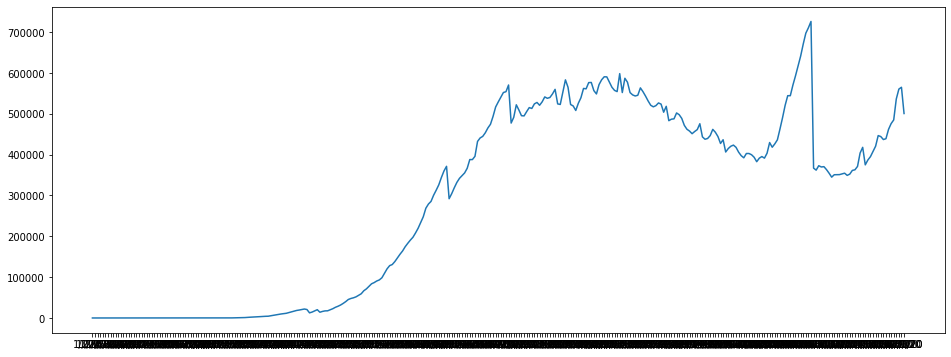

In [64]:
fig = plt.figure(figsize= (17,8))
ax = fig.add_subplot(111)
ax.plot(df.date, df.var_RecDif)